# Generate a fake Relational Database

Creating a fake relational database involves producing synthetic data that replicates the structure and relationships of a real database without using actual sensitive information. This includes generating tables with realistic data types, foreign keys, constraints, and data distributions that mimic real-world scenarios.

Why It's Relevant
Using synthetic databases is crucial for development, testing, and training purposes while ensuring data privacy and compliance. It allows organizations to simulate real-world conditions, optimize performance, and identify issues without risking exposure of confidential data.

**Use Cases**

- *Development and Testing:* Enables developers to build and test applications using realistic data structures, helping to uncover bugs and performance issues early.
- *Data Science and Machine Learning:* Allows data scientists to train and validate models with large datasets that resemble real data, facilitating experimentation without privacy concerns.
- *ETL and Data Integration:* Helps data engineers test data pipelines and transformations, ensuring data integrity during integration processes.
- *Performance Optimization:* Provides the means to conduct scalability tests and optimize queries using substantial volumes of data to simulate high-load scenarios.
- *Training and Onboarding:* Offers new team members hands-on experience with data structures similar to production environments without accessing sensitive information.

With YData Fabric you can create and design the schema that you want to create fake data records for, or you can generate fake data from an existing database schema.

## Creating the database schema

### Configure your schema definition from scratch

To define the configuration for the faker synthesizer we will be leveraging the structure of YAML files.  For that we will need to structure it to represent each table, specify the columns, and last but not the least define relationships as follows:

**Configuration Guide**

- Define Tables: Create sections for each table (e.g., account, card, client), which represent the entities in the relational database.

**Specify Columns:**

- *Primary Key:* Designate a unique identifier for each table, using the primary_key: true attribute.
- *Data Types and Formats:* Set each column’s datatype (e.g., numerical, categorical, date) and vartype (e.g., int, string, float). For date columns, include format to specify how dates should appear.
- *Ranges and Constraints:* Define realistic data ranges using min and max values for numerical or date fields and categories for categorical data.

**Establish Relationships:**

- *Foreign Keys:* Use the foreign_key attribute to reference columns in related tables. Specify the parent_column and parent_table as well as the relation_type (e.g., 1-1, 1-n).
- *References:* Define min_references and max_references to control how many times each foreign key appears in the child table, maintaining realistic relational constraints.

**Handle Unique and Missing Data:**

- *Unique Constraints:* Use unique: true where columns should contain unique values.
- *Missing Values:* If applicable, include missings to represent the percentage of missing values for certain columns.
- *Additional Characteristics:* For certain attributes, like names, use characteristic (e.g., name) to simulate specific data types with realism (e.g., first names, last names).

This setup provides a detailed, realistic structure for generating synthetic relational databases, ensuring data integrity, realistic constraints, and relationships that resemble production databases while keeping data privacy intact.

In the example below we are reading the definition set in the *berka.yaml* file

In [1]:
import yaml

file = "berka.yml"
with open(file, "r") as f:
    faker_config = yaml.safe_load(f)

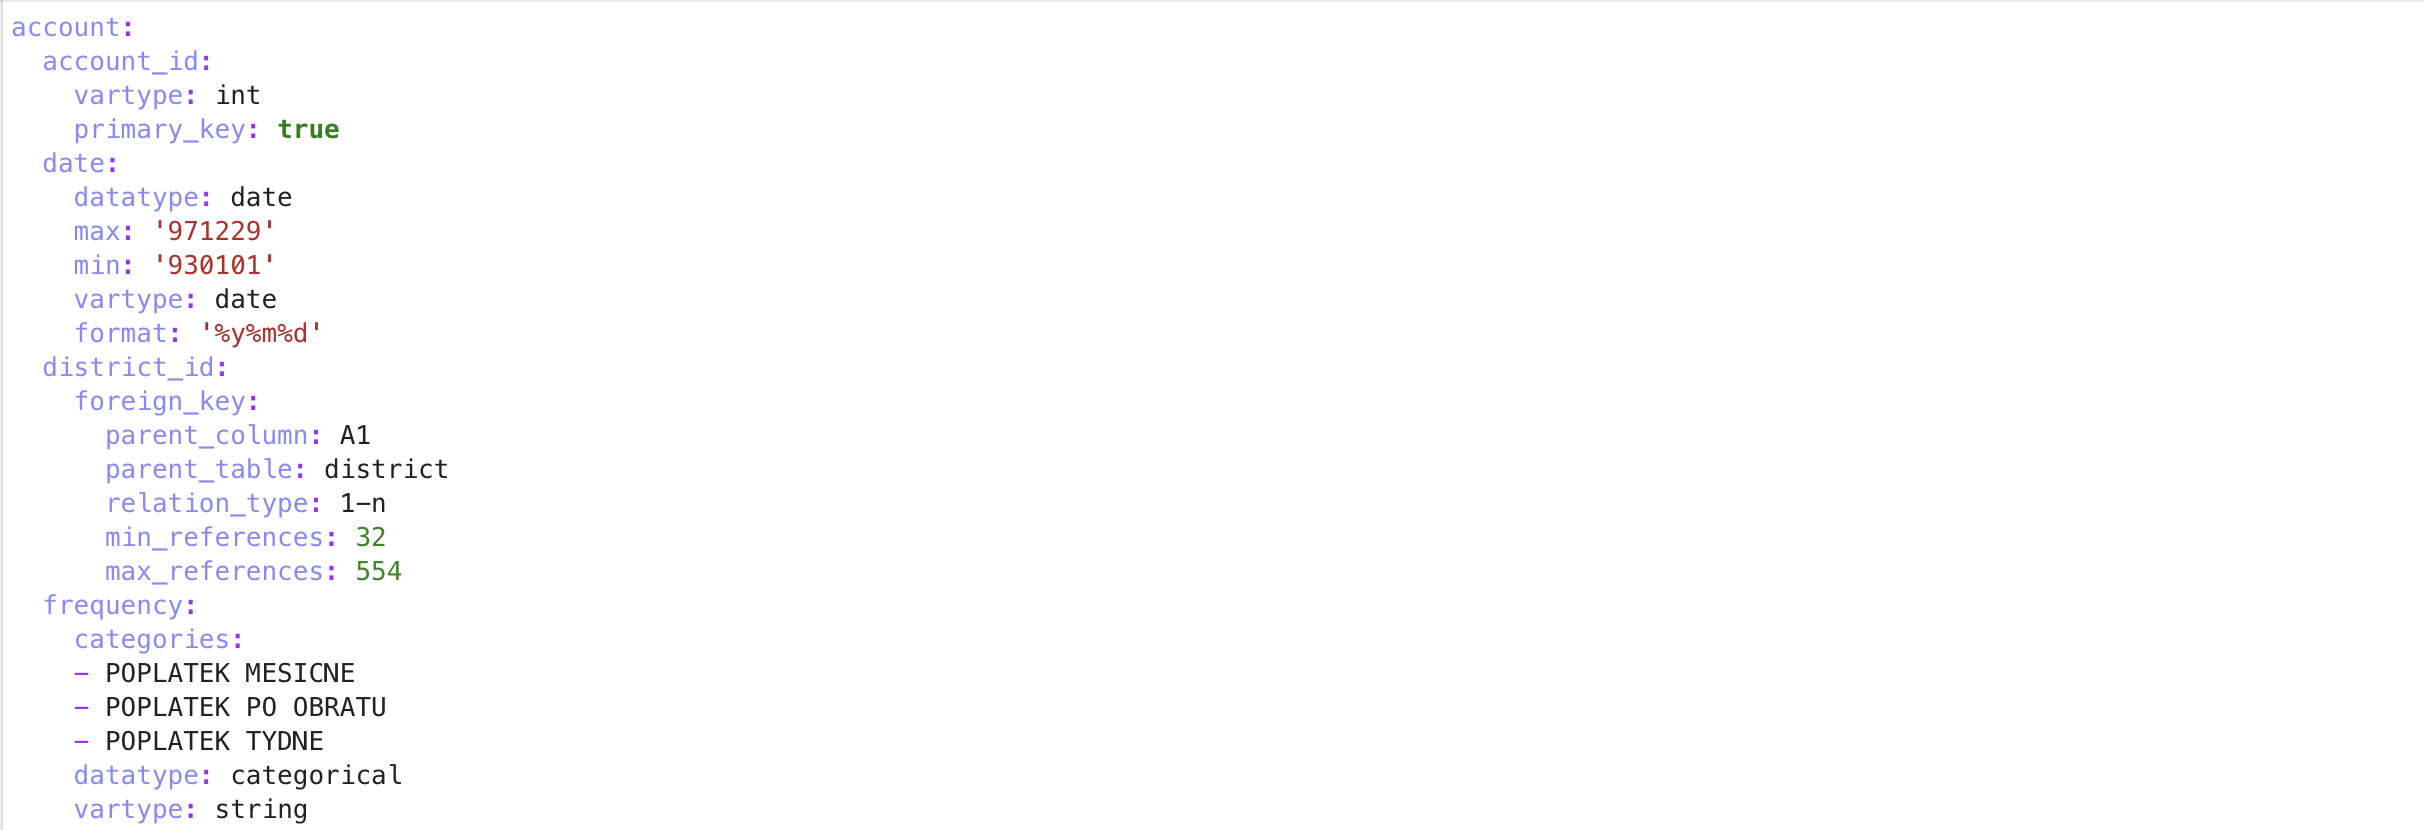

### Leverage the schema definition from an existing database

If you’re using an existing database schema to pre-populate a YAML configuration for generating a fake relational database, you can streamline the process by extracting metadata directly from the schema. Here’s how you can leverage this information:

**Steps to Pre-populate YAML Using an Existing Database Schema**

1. Extract the schema information from the database: Leveraging Fabric's Data Catalog, it is possible to get the schema of an existing database. Select the connector you need and click in *"Use in Labs"* to copy the code snippet below.  

For more information on how to create a connector, please [check Fabric's documentation on how to create a connector](https://docs.fabric.ydata.ai/latest/data_catalog/connectors/create_connector/).

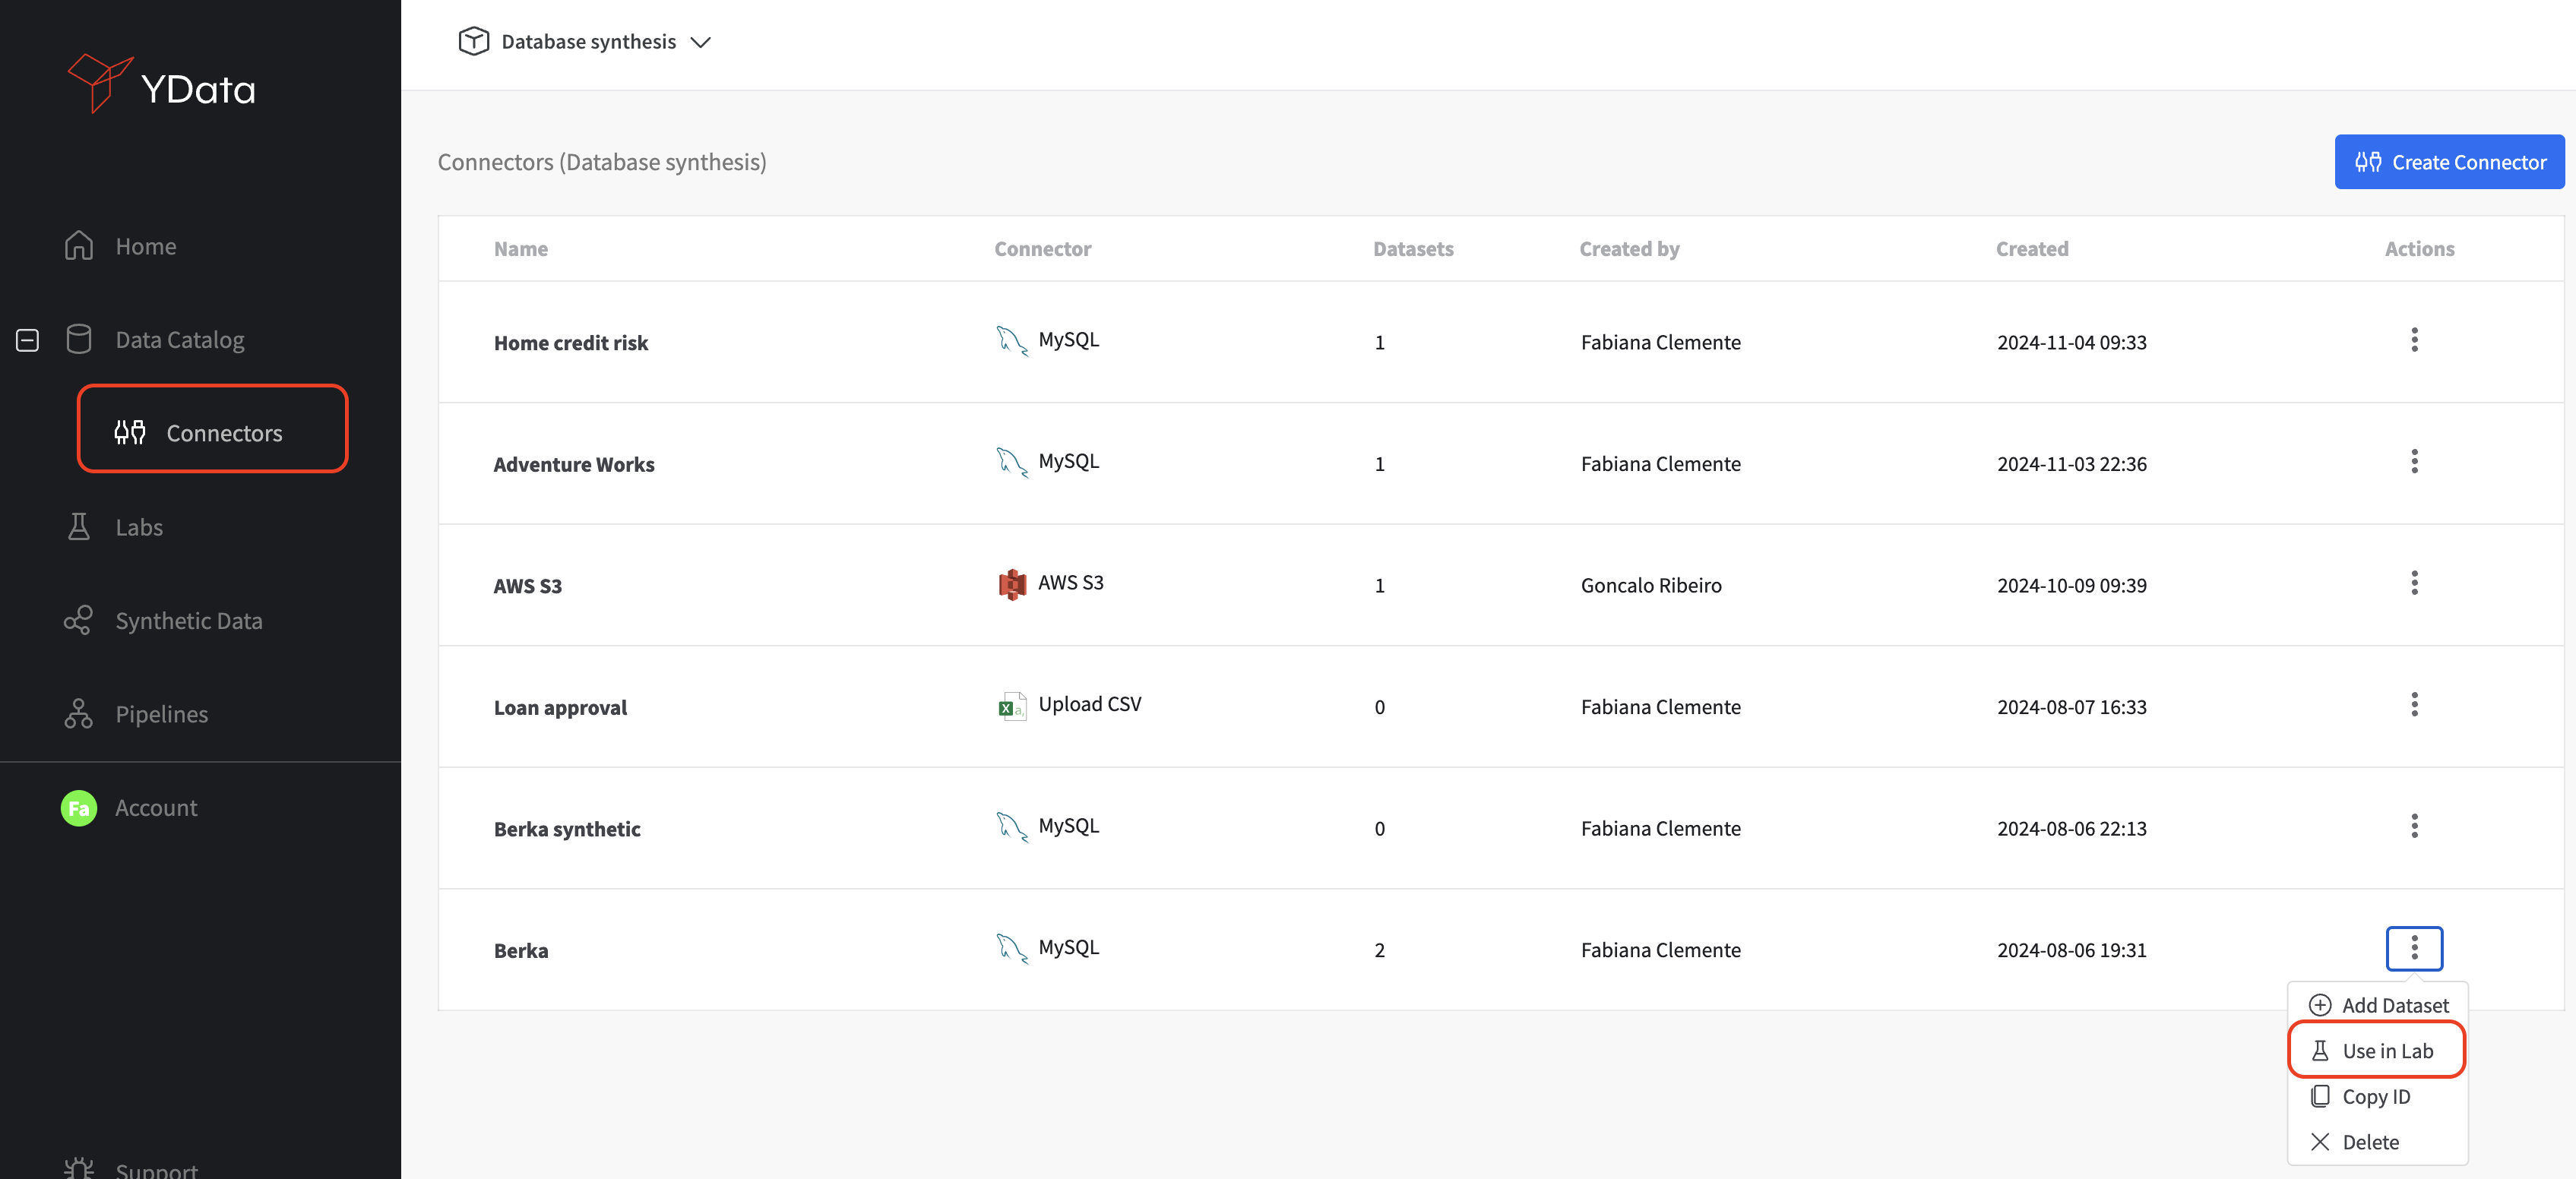

In [6]:
import yaml
# Importing YData's packages
from ydata.labs import Connectors

# Getting a previously created Connector
source_connector = Connectors.get(uid='a070e03a-706d-4336-96f5-fed35b54312a', 
                           namespace='4993afef-5f60-40a7-a61d-b42ceb77016c')
print(connector)


MySQLConnector(
  
  uid='a070e03a-706d-4336-96f5-fed35b54312a',
  name='Berka',
  type=ConnectorType.MYSQL,
  connection=Connection(host='data-science-mysql-41955.c1xxv3f18hni.eu-west-1.rds.amazonaws.com', port=3306),
  database=berka)


2. Generate the faker schema config (yaml file structure): from the database extracted schema using the auxiliar function *get_faker_schema_from_connector* generate your yaml configuration

In [9]:
from synthesizers.faker.utils import get_faker_schema_from_connector

get_faker_schema_from_connector(
    source_connector,
    output="faker_schema.yml"
)

3. Finally, validate your configuration: ensure that the structure capture the tables, columns and relations that you wanted. Make sure that you configure *datatypes* as well as other mandotory fields depending on the observed variable type. 

In [10]:
file = "faker_schema_edited.yml"
with open(file, "r") as f:
    faker_config = yaml.safe_load(f)

### Configuration helper functions

Given that relational databases can get complex and extensive very easily, we want to make sure that we can guide your through the information that is required, and what is the information that we can infer from the rest of the input data. 

In this case, and because the relation between some tables might be decisive to generate the number of rows of a third table, YData Fabric offers and auxiliary function *get_tables_that_requires_nrows* that you can use to understand for which tables it is required to set the numebr of rows. 

In [12]:
from synthesizers.faker.utils import get_tables_that_requires_nrows

get_tables_that_requires_nrows(faker_config)

['append', 'district']

In [13]:
table_sizes = {
    "append": 20,
    "district": 10,
}

## Create, train & generate data from your Faker Relational database synthesizer

To efficiently create a fake relational database, a connector is needed to write the generated data directly into a database. 
This setup streamlines the process and improves performance by avoiding manual data handling. You can check how to [create a database connector in Fabric's documentation](https://docs.fabric.ydata.ai/latest/data_catalog/connectors/create_connector/).

In [16]:
# Importing YData's packages
from ydata.labs import Connectors
# Getting a previously created Connector

write_connector = Connectors.get(uid='575918b8-e5f9-487d-9bba-08b6306e8a3d', 
                           namespace='4993afef-5f60-40a7-a61d-b42ceb77016c')
print(connector)


MySQLConnector(
  
  uid='575918b8-e5f9-487d-9bba-08b6306e8a3d',
  name='Berka synthetic',
  type=ConnectorType.MYSQL,
  connection=Connection(host='data-science-mysql-41955.c1xxv3f18hni.eu-west-1.rds.amazonaws.com', port=3306),
  database=berka_synth)


Additionally, you can also configure the writing mode of the data - *fail*, in case the destination schema already has data, *append* in case you want to augment the existing data and last but not the least, *replace*, in case you want to delete and write new data.
the same faker synthesizer configuration file can be reused to generate multiple instances of the fake database, allowing for consistent data structures across various environments or testing scenarios.

In [17]:
from synthesizers.faker.utils import generate_relational_database

generate_relational_database(
    faker_config,
    table_sizes,
    write_connector,
    if_exists="replace",
    locale="en",
)

## Create a new Datasource in the Data Catalog

Now that it was succesfully generated the fake relational database, it is possible to add that newly generated data in Fabric's Data Catalog. In this case and because we have written the data to a MySQL database, it is required to configure a *MySQLDataSource* datasource with the followign infromation:

- name: the name of the new datasource to add to the Data Catalog
- connector: the connector that we have used to write the data
- data_type: 'tabular', 'time-series' or 'mulitTable' in case we are dealing with a relational database

In [20]:
from ydata.labs import MySQLDataSource

datasource = MySQLDataSource(
    name='Synthetic Fake Berka',
    connector=connector,
    data_type="multiTable",
    #allTables=True,
)

datasource.create()

'\ndatasource = MySQLDataSource(\n    name=\'Synthetic Fake Berka\',\n    connector=connector,\n    data_type="multiTable",\n    #allTables=True,\n)\n\ndatasource.create()\n'